In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Using pandas to: Load the data from Excel file , get the information of the Dataframe

In [40]:
# Load the CSV file into a DataFrame
df = pd.read_csv('StudentsPerformance.csv')

# Get information about the DataFrame
print(f'-The column are : {df.columns}')
print('-' * 100)
print(df.head())
print('-' * 100)
print(df.tail())
print('-' * 100)
print(df.describe())
print('-' * 100)
print(df.info())

-The column are : Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')
----------------------------------------------------------------------------------------------------
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72            NaN           74.0  
1               completed          69           90.0           88.0  
2                    none          90           95.0           

# 2.Find the missing value of each column

In [41]:
missing_values = df.isnull().sum()

# Display the missing values
print(missing_values)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        2
math score                     0
reading score                  3
writing score                  4
dtype: int64


# 3.Fill the Missing values :
    a. If it is the Number: fill it by 0
    b. If it is categorical: fill it by none


In [42]:
columns = df.columns
for column in columns:
    if df[column].dtype == 'object':
        df[column].fillna('none', inplace=True)  # Fill missing values with 'none'
    # Check if the column is numerical (int64 or float64 type)
    elif df[column].dtype in ['int64', 'float64']:
        df[column].fillna(0, inplace=True)       # Fill missing values with 0

# Print the DataFrame after filling missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race/ethnicity               1000 non-null   object 
 2   parental level of education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test preparation course      1000 non-null   object 
 5   math score                   1000 non-null   int64  
 6   reading score                1000 non-null   float64
 7   writing score                1000 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB
None


# 4.Count the number of Male and Female Students

In [43]:
gender_counts = df['gender'].value_counts()
gender_counts

female    518
male      482
Name: gender, dtype: int64

# 5.Using countplot in seaborn: 
    a.Create plot to represent the number of Male and Female student

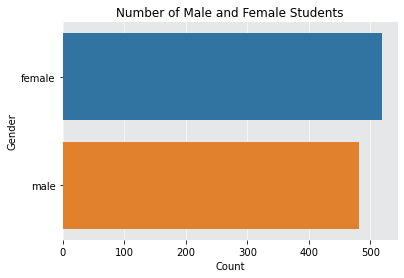

In [44]:
sns.countplot(y='gender', data=df, zorder=2)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Number of Male and Female Students')
plt.gca().set_facecolor('#e5e7e9')
sns.despine(left=True, bottom=True);
plt.grid(axis='x', linestyle='-', alpha=0.7, zorder=1, color='white')  # 'both' for vertical and horizontal

# b. Create plot to divide the data by race/ethnicity

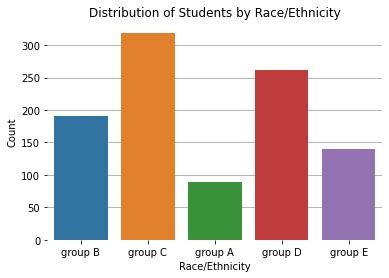

In [45]:
sns.countplot(x='race/ethnicity', data=df, zorder = 2)

# Add labels and title
plt.ylabel('Count')
plt.xlabel('Race/Ethnicity')
plt.title('Distribution of Students by Race/Ethnicity')
sns.despine(left=True, bottom=True);
plt.grid(axis='y', linestyle='-', alpha=0.7, zorder=1, color='grey')  

# c. Create plot to see the distribution of parental education levels split by degree type

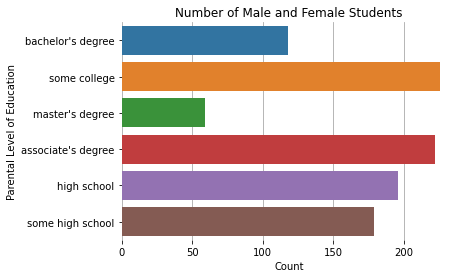

In [46]:
sns.countplot(y='parental level of education', data=df, zorder=2)

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Parental Level of Education')
plt.title('Number of Male and Female Students')
plt.gca().set_facecolor('white')
sns.despine(left=True, bottom=True);
plt.grid(axis='x', linestyle='-', alpha=0.7, zorder=1, color='grey')  # 'both' for vertical and horizontal

# 6. Using scatter plot in seaborn:
    a. Create a plot to show the Math and Reading scores with the color representing gender.

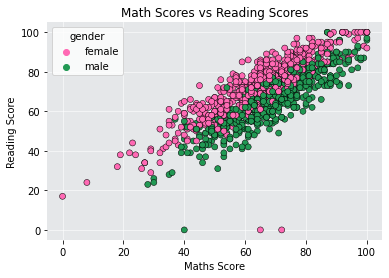

In [47]:
sns.scatterplot(data=df, x='math score', y='reading score', hue='gender', 
                palette={'male': '#229954', 'female': '#FF69B4'}, zorder=2, linewidth=0.5, edgecolor='black')

# Adding titles and labels
plt.title('Math Scores vs Reading Scores')
plt.xlabel('Maths Score')
plt.ylabel('Reading Score')
plt.gca().set_facecolor('#e5e7e9')
sns.despine(left=True, bottom=True);
plt.grid(linestyle='-', alpha=0.7, zorder=1, color='white')  

# b. Create a plot to show the Math and Writing scores with the color representing gender. 


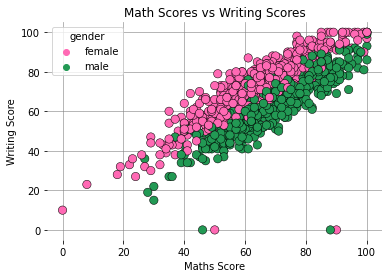

In [48]:
sns.scatterplot(data=df, x='math score', y='writing score', hue='gender',
                palette={'male': '#229954', 'female': '#FF69B4'}, zorder=2, s=70, linewidth=0.5, edgecolor='black')

# Adding titles and labels
plt.title('Math Scores vs Writing Scores')
plt.xlabel('Maths Score')
plt.ylabel('Writing Score')
sns.despine(left=True, bottom=True);
plt.grid(linestyle='-', alpha=0.7, zorder=1, color='grey')

# c. Create a plot to show the Writing and Reading scores with the color representing gender.

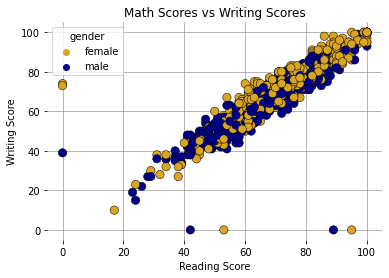

In [49]:
sns.scatterplot(data=df, x='reading score', y='writing score', hue='gender',
                palette={'male': '#00008B', 'female': '#DAA520'}, zorder=2, s=70, linewidth=0.5, edgecolor='black')

# Adding titles and labels
plt.title('Math Scores vs Writing Scores')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')
sns.despine(left=True, bottom=True);
plt.grid(linestyle='-', alpha=0.7, zorder=1, color='grey')

# d. We know that the “totd. al marks” is the target variable in this specific dataset. Using kdeplot in seaborn to create plot of total mark if each students.

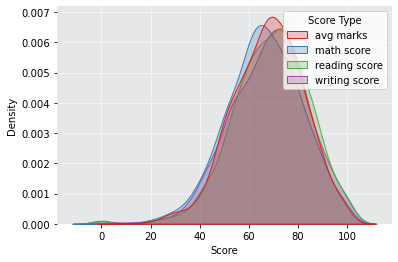

In [50]:
df['avg marks'] = df[['math score', 'reading score', 'writing score']].sum(axis=1)/3
df_melted = df.melt(value_vars=['avg marks', 'math score', 'reading score', 'writing score'], 
                    var_name='Score Type', value_name='Score')
sns.kdeplot(data=df_melted, x='Score', hue='Score Type', fill=True, palette='Set1', zorder=2)
plt.gca().set_facecolor('#e5e7e9')
# remove border
sns.despine(left=True, bottom=True);
plt.grid(linestyle='-', alpha=0.7, zorder=1, color='white')
